**COMS E6998.015 - PRAC DEEP LEARNING SYS - Fall 2024**





*Homework 1 Solutions || Submitted By: Vaibhaw K Shende, **vks2116** @ columbia.edu*

**Solution to Problem 1 - Bias Variance Tradeoff, Regularization**


**Part 1 : Proof of Bias-variance Tradeoff**

Below is the derivation and proof that the bias-variance decomposition for a regression problem, can be written as :
$E[MSE] = \text{Bias}^2 + \text{Variance} + \text{Noise}$




We start with the definition of prediction error to be the squared difference in model prediction $\hat{y}$ =g(x) and observations y

$\mathop{\mathbb{E}}[MSE] =  \mathop{\mathbb{E}} [(g(x) - y)^2]$
                            

>>>$=\mathop{\mathbb{E}} [g(x)^2 - 2 g(x) y + y^2 ]$

>>>$=\mathop{\mathbb{E}} [g(x)^2] - 2 \mathop{\mathbb{E}}[g(x) y] + \mathop{\mathbb{E}}[y^2 ]$............. (1)

Now, we refer to the variance formulae, $variance =\mathop{\mathbb{E}}[ (g(x) - \mathop{\mathbb{E}}[g(x)])^2] $ . With this, we expand the terms $\mathop{\mathbb{E}} [g(x)^2]$ and $\mathop{\mathbb{E}} [y^2]$ as follows..


>>$\mathop{\mathbb{E}} [g(x)^2] = \mathop{\mathbb{E}} [ (g(x) - \mathop{\mathbb{E}}[g(x)] )^2] + \mathop{\mathbb{E}} [g(x)]^2$............. (2)

>>$\mathop{\mathbb{E}} [y^2] = \mathop{\mathbb{E}} [ (y - \mathop{\mathbb{E}}[f(x)] )^2] + [f(x)]^2$............. (3)

*Note, references to the above exquation are drawn from article [Model Selection: Underfitting, Overfitting, and the Bias-Variance Tradeoff](https://dustinstansbury.github.io/theclevermachine/bias-variance-tradeoff)*

Substitutng (2) and (3) in eq (1), we have...

$\mathop{\mathbb{E}}[MSE] = \mathop{\mathbb{E}}[(g(x)−E[g(x)])^2]+\mathop{\mathbb{E}}[g(x)]^2−2\mathop{\mathbb{E}}[g(x)]f(x)+\mathop{\mathbb{E}}[(y−f(x))^2]+f(x)^2$............. (4)

Rearranging Eq (4), we have ...

$\mathop{\mathbb{E}}[MSE] = \mathop{\mathbb{E}}[(g(x)−\mathop{\mathbb{E}}[g(x)])^2]+(\mathop{\mathbb{E}}[g(x)]^2−2\mathop{\mathbb{E}}[g(x)]f(x)+f(x)^2)+\mathop{\mathbb{E}}[(y−f(x))^2]$............. (5)

which can be further simplified by reversing a polynomial expansion and highlighting three terms

$\mathop{\mathbb{E}}[MSE] =
\color{green}{\mathop{\mathbb{E}}[(g(x)−\mathop{\mathbb{E}}[g(x)])^2]}
+
\color{blue}{(\mathop{\mathbb{E}}[g(x)]^2−2\mathop{\mathbb{E}}[g(x)]f(x)+f(x)^2)}
+
\color{red}{\mathop{\mathbb{E}}[(y−f(x))^2]}$
............. (6)

1. The first term is the $\color{green}{variance-of-the-estimator}$ introduced above.
2. The second term is the $\color{blue}{squared-bias-of-the-estimator}$, also introduced above.
3. The third term is the $\color{red}{variance-of-the-observation-noise}$ and describes how much the observations $y$ vary from the true function $f(x)$.

This can be written in simpler terms as ..

>> $\mathop{\mathbb{E}}[MSE] = Bias^2 + Variance + Noise$

Hence Proved.

**Part 2 : Display $f (x) = x + sin(1.5x)$ and $ε = N (0, 0.3)$**

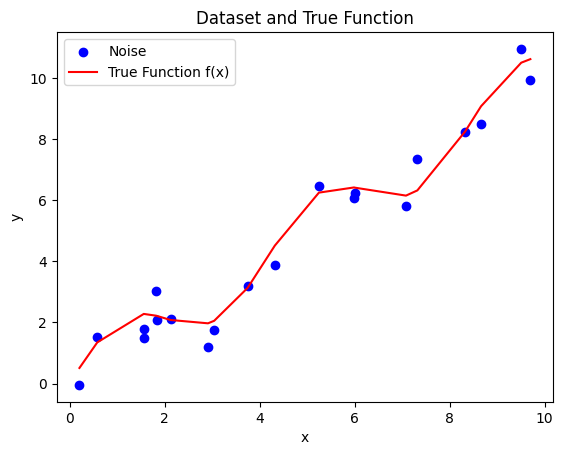

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate x values
x = np.random.uniform(0, 10, 20)
x.sort()  # Sort x values for plotting

# Generate y values with noise
noise = np.random.normal(0, np.sqrt(0.3), 20)
y = x + np.sin(1.5 * x) + noise

# True function
f_x = x + np.sin(1.5 * x)

# Plotting
plt.scatter(x, y, label='Noise', color='blue')
plt.plot(x, f_x, label='True Function f(x)', color='red')
plt.title('Dataset and True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


**Part 3: Estimator Functions for $f(x)$ and Model Fitting**

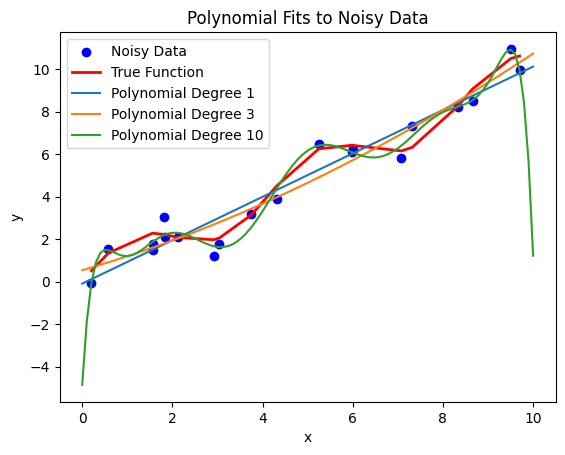

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Reshape x for sklearn
x = x.reshape(-1, 1)

# Fit polynomial models
degrees = [1, 3, 10]
models = {}
for degree in degrees:
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    models[degree] = model

# Plotting
plt.scatter(x, y, label='Noisy Data', color='blue')
plt.plot(x, f_x, label='True Function', color='red', linewidth=2)

# Plot each polynomial fit
for degree, model in models.items():
    x_range = np.linspace(0, 10, 100).reshape(-1, 1)
    x_range_poly = PolynomialFeatures(degree).fit_transform(x_range)
    y_pred = model.predict(x_range_poly)
    plt.plot(x_range, y_pred, label=f'Polynomial Degree {degree}')

plt.title('Polynomial Fits to Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Analysis:** Out of the 3 estimator $g_1(x)$ , $g_3(x)$ and $g_{10}(x)$ , based on the graph above \:


*   $g_1(x)$ \: Seems to be underfitting, as it is not flexible enough to capture the underlying trends in the observed data.
*   $g_3(x)$ \: Provides a more desirable estimate of $f(x)$
*   $g_{10}(x)$ \: Is overfitting as the estimator is too flexible, allowing it to capture illusory trends in the data.  




**Part 4: Bias-Variance Tradeoff Analysis**

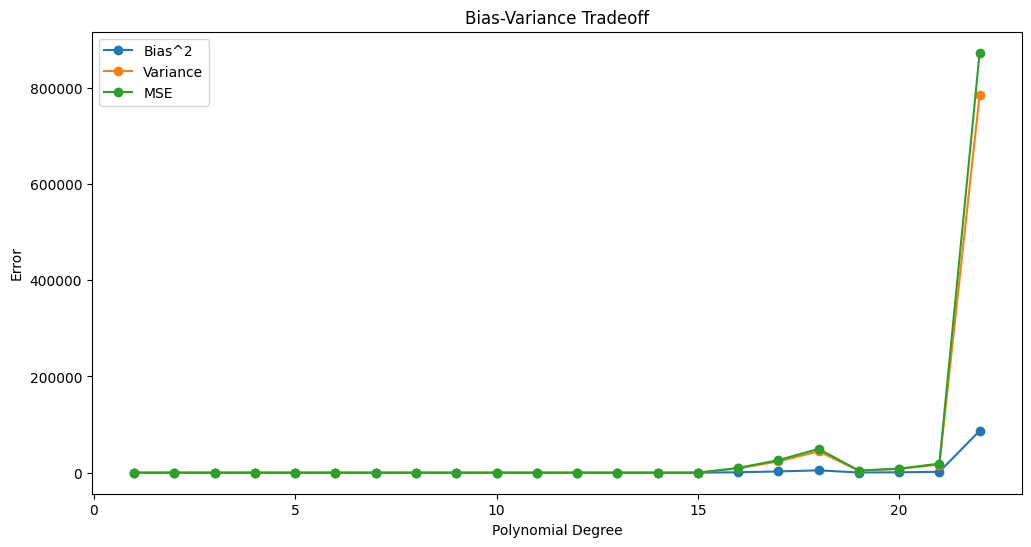

In [ ]:
#Take 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Parameters
num_datasets = 100
dataset_size = 50
test_size = 10
train_size = dataset_size - test_size
max_degree = 22

# Pre-sample the test set
x_test = np.linspace(0, 10, test_size).reshape(-1, 1)
f_test = x_test + np.sin(1.5 * x_test)
noise_test = np.random.normal(0, np.sqrt(0.3), size=x_test.shape)
y_test = f_test + noise_test.flatten()

biases = []
variances = []
mses = []

for _ in range(num_datasets):
    # Generate training dataset
    x_train = np.random.uniform(0, 10, train_size).reshape(-1, 1)
    f_train = x_train + np.sin(1.5 * x_train)
    noise_train = np.random.normal(0, np.sqrt(0.3), size=x_train.shape)
    y_train = f_train + noise_train.flatten()

    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree)
        x_poly_train = poly.fit_transform(x_train)
        model = LinearRegression()
        model.fit(x_poly_train, y_train) # Model training

        # Predictions
        x_poly_test = poly.transform(x_test)
        #interim_x_poly_test = x_poly_test[:,degree]
        y_pred = model.predict(x_poly_test)

        # Calculate bias, variance, and MSE
        #bias = np.mean((y_pred - f_test.flatten())**2)
        bias = (np.mean(y_pred) - np.mean(f_test))**2
        variance = np.var(y_pred)
        mse = np.mean((y_test - y_pred[:,degree])**2)
        #mse = mean_squared_error(y_test, y_pred)

        biases.append(bias)
        variances.append(variance)
        mses.append(mse)

# Convert to numpy arrays for reshaping
biases = np.array(biases).reshape(num_datasets, max_degree)
variances = np.array(variances).reshape(num_datasets, max_degree)
mses = np.array(mses).reshape(num_datasets, max_degree)

# Calculate average bias, variance, MSE
avg_bias = np.mean(biases, axis=0)
avg_variance = np.mean(variances, axis=0)
avg_mse = np.mean(mses, axis=0)

# Plot bias, variance, and MSE
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_degree + 1), avg_bias, label='Bias^2', marker='o')
plt.plot(range(1, max_degree + 1), avg_variance, label='Variance', marker='o')
plt.plot(range(1, max_degree + 1), avg_mse, label='MSE', marker='o')
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.legend()
plt.show()


**Analysis:** From the above graph the best fit model seems to be the one with 16 degree polynomial, where the $bias^2$ and $variance$ is minimal.



**Part 5: Apply $L_2$ regularization**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.7747e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


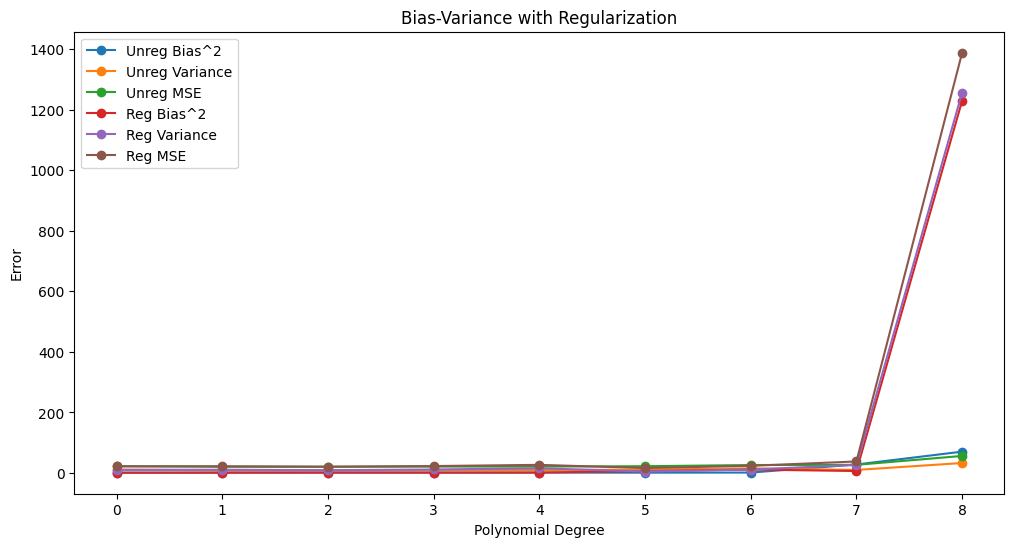

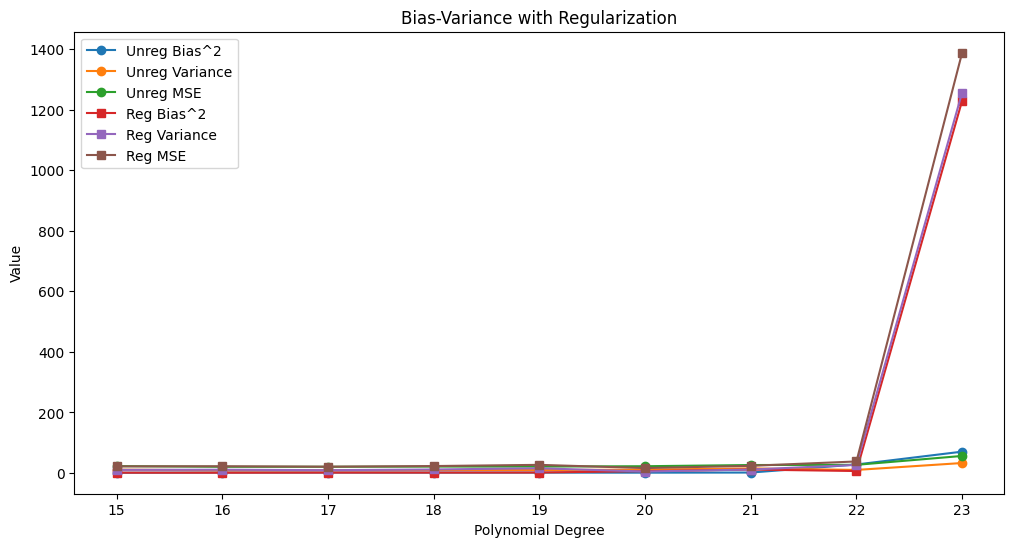

In [ ]:
#take 2
from sklearn.linear_model import Ridge

unreg_biases, reg_biases  = [], []
unreg_variances, reg_variances = [], []
unreg_mses, reg_mses = [], []

max_degree = 23

for degree in range(15, max_degree + 1):
  # Fit unregularized and regularized model for degree 10
  poly = PolynomialFeatures(degree)
  x_poly_train = poly.fit_transform(x_train)
  x_poly_test = poly.transform(x_test)

  # Unregularized model
  model_unreg = LinearRegression()
  model_unreg.fit(x_poly_train, y_train)
  y_pred_unreg = model_unreg.predict(x_poly_test)

  # Regularized model with L2 regularization
  model_reg = Ridge(alpha=1.0)  # Regularization rate
  model_reg.fit(x_poly_train, y_train)
  y_pred_reg = model_reg.predict(x_poly_test)

  # Calculate bias, variance, and MSE for both models
  bias_unreg = np.mean((y_pred_unreg[:,1] - f_test.flatten())**2)
  variance_unreg = np.var(y_pred_unreg)
  mse_unreg = np.mean((y_test - y_pred_unreg[:,1])**2)

  unreg_biases.append(bias_unreg)
  unreg_variances.append(variance_unreg)
  unreg_mses.append(mse_unreg)

  bias_reg = np.mean((y_pred_reg[:,1] - f_test.flatten())**2)
  variance_reg = np.var(y_pred_reg)
  mse_reg = np.mean((y_test - y_pred_reg[:,1])**2)

  reg_biases.append(bias_reg)
  reg_variances.append(variance_reg)
  reg_mses.append(mse_reg)

# Plot bias, variance, and MSE
plt.figure(figsize=(12, 6))
plt.plot(unreg_biases, label='Unreg Bias^2', marker='o')
plt.plot(unreg_variances, label='Unreg Variance', marker='o')
plt.plot(unreg_mses, label='Unreg MSE', marker='o')

plt.plot(reg_biases, label='Reg Bias^2', marker='o')
plt.plot(reg_variances, label='Reg Variance', marker='o')
plt.plot(reg_mses, label='Reg MSE', marker='o')

plt.title('Bias-Variance with Regularization')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.legend()
plt.show()

num_datasets = max_degree - 15 + 1

# Convert to numpy arrays for reshaping
unreg_biases = np.array(unreg_biases).reshape(num_datasets)
unreg_variances = np.array(unreg_variances).reshape(num_datasets)
unreg_mses = np.array(unreg_mses).reshape(num_datasets)
reg_biases = np.array(reg_biases).reshape(num_datasets)
reg_variances = np.array(reg_variances).reshape(num_datasets)
reg_mses = np.array(reg_mses).reshape(num_datasets)

# Calculate average bias, variance, MSE
avg_unreg_bias = np.mean(unreg_biases, axis=0)
avg_unreg_variance = np.mean(unreg_variances, axis=0)
avg_unreg_mse = np.mean(unreg_mses, axis=0)
avg_reg_bias = np.mean(reg_biases, axis=0)
avg_reg_variance = np.mean(reg_variances, axis=0)
avg_reg_mse = np.mean(reg_mses, axis=0)

# Plot bias, variance, and MSE
plt.figure(figsize=(12, 6))
plt.plot(range(15, max_degree + 1), unreg_biases, label='Unreg Bias^2', marker='o')
plt.plot(range(15, max_degree + 1), unreg_variances, label='Unreg Variance', marker='o')
plt.plot(range(15, max_degree + 1), unreg_mses, label='Unreg MSE', marker='o')
plt.plot(range(15, max_degree + 1), reg_biases, label='Reg Bias^2', marker='s')
plt.plot(range(15, max_degree + 1), reg_variances, label='Reg Variance', marker='s')
plt.plot(range(15, max_degree + 1), reg_mses, label='Reg MSE', marker='s')
plt.title('Bias-Variance with Regularization')
plt.xlabel('Polynomial Degree')
plt.ylabel('Value')
plt.legend()
plt.show()


**Analysis:** While analyzing the $Bias$, $Variance$, and $MSE$ with and without Regularization, we found that \:

With regularized model the $Bias$, $Variance$, and $MSE$ are lower. The above graph shows the difference between regularized and unregularized model. It also shows that for higher degree polynomials the difference becomes ever wider.